# Iris Data Classification

## Data Import and Exploration

In [413]:
data_path = "/mnt/a/Codes/Data/iris.csv"

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

In [415]:
data= pd.DataFrame(pd.read_csv(data_path))

In [416]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [418]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [419]:
from sklearn.preprocessing import StandardScaler
data.iloc[:,1:5] = StandardScaler().fit_transform(data.iloc[:,1:5])

In [420]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [421]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,75.500000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,43.445368,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,1.000000,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,38.250000,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,75.500000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,112.750000,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,150.000000,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [422]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct = pca.fit_transform(data.iloc[:,1:5])
pc = pd.DataFrame(pct,columns=['pc1','pc2'])
data2d= pd.concat([pc,data.Species],axis=1)
data2d.head()

,pc1,pc2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


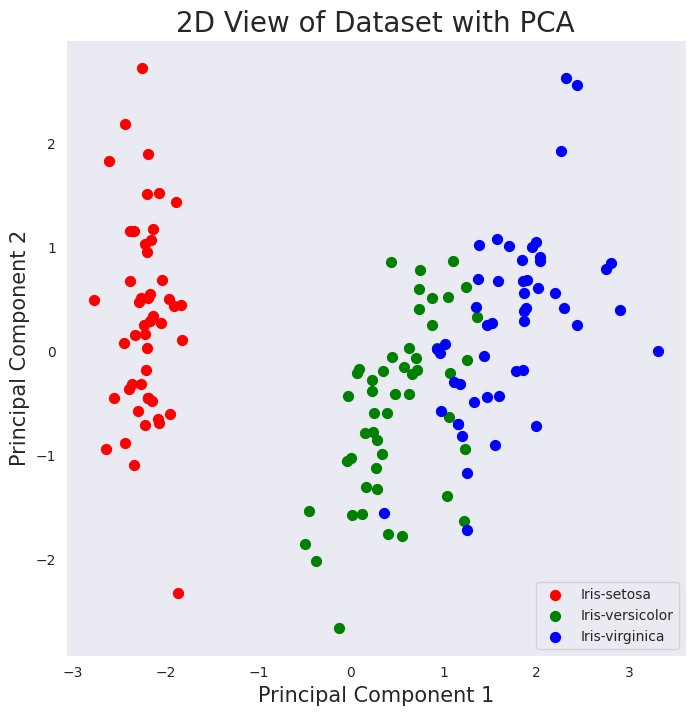

In [423]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D View of Dataset with PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
        indicesToKeep = data2d.Species == target
        ax.scatter(data2d.loc[indicesToKeep, 'pc1'],
                   data2d.loc[indicesToKeep, 'pc2'],
                   c=color,
                   s=50)
ax.legend(targets)
ax.grid()

In [424]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


## Data Splitting and Model Training

In [425]:
from sklearn.model_selection import train_test_split as tts
train, test = tts(data, test_size = 0.3)

trainX = train.iloc[:,:4]
trainY = train['Species']

testX = test.iloc[:,:4]
testY = test['Species']

In [426]:
from sklearn.svm import SVC as SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neural_network import  MLPClassifier as MLP

In [427]:
models= (SVC(kernel='rbf'),
        SVC(kernel='linear'),
        DT(criterion='gini'),
        LogR(max_iter=1000),
        NB(),
        MLP(solver='adam', alpha=1e-5, hidden_layer_sizes=(16,32,24,8), random_state=1))

In [428]:
models = [clf.fit(trainX,trainY) for clf in models]

/home/therockomanz/anaconda3/envs/GPU/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [429]:
predictions = [clf.predict(testX) for clf in models]

In [430]:
models

[SVC(),
 SVC(kernel='linear'),
 DecisionTreeClassifier(),
 LogisticRegression(max_iter=1000),
 GaussianNB(),
 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 32, 24, 8), random_state=1)]

## Prediction Results and Analysis

In [431]:
result={}
result['Original']= testY
result['SVM-rbf']= predictions[0]
result['SVM-linear']= predictions[1]
result['DecisionTree']= predictions[2]
result['LogisticRegression']= predictions[3]
result['NaiveBayes']= predictions[4]
result['Perceptron']= predictions[5]

In [432]:
result = pd.DataFrame(result)

In [433]:
result

,Original,SVM-rbf,SVM-linear,DecisionTree,LogisticRegression,NaiveBayes,Perceptron
53,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
128,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
87,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
13,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
57,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
15,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
123,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
27,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [434]:
from sklearn.metrics import confusion_matrix,classification_report
for i in result.iloc[:,1:]:
        print("\t\t\t\t"+i+"\n")
        print(classification_report(result.Original,result[i])+"\n\n")

				SVM-rbf

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



				SVM-linear

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



				DecisionTree

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93    

In [435]:
cm = [confusion_matrix(result.Original,result[i]) for i in result.iloc[:,1:]]

In [436]:
import seaborn as sns
classes = list(result.Original.unique())

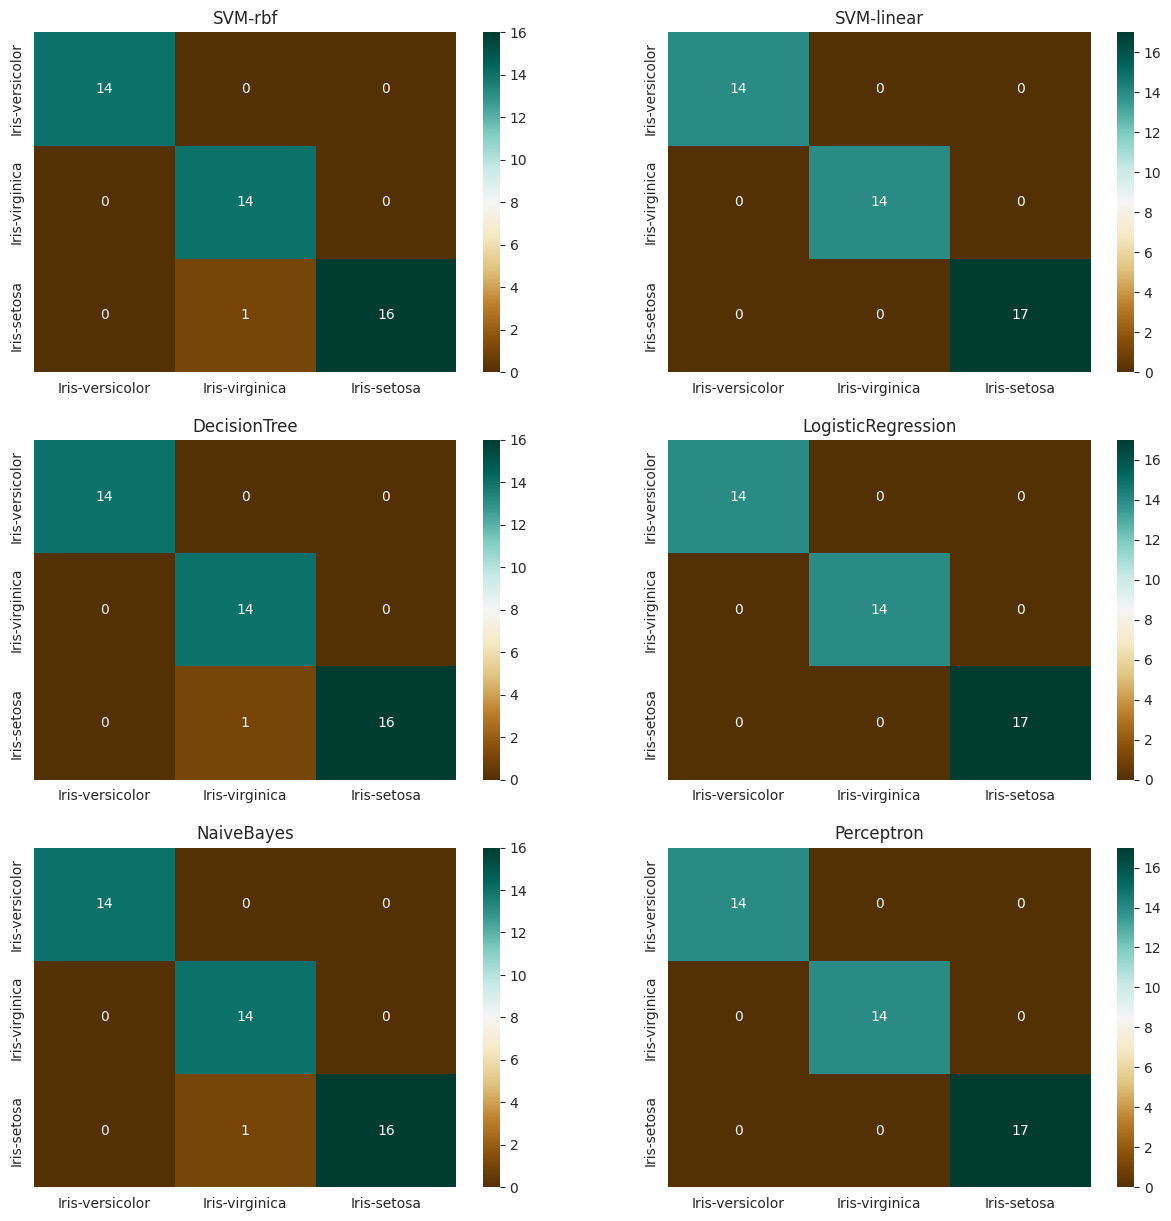

In [437]:
fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2
for i in range(1,7):
        fig.add_subplot(rows, columns, i)
        plt.title(result.columns[i])
        sns.heatmap(cm[i-1],annot=True, fmt= '',xticklabels=classes,yticklabels=classes, cmap='BrBG')

In [438]:
from sklearn.metrics import accuracy_score
accuracy_stats = []
for i in result.iloc[:,1:]:
        accuracy_stats.append(accuracy_score(result.Original,result[i]))

modelnames = [i for i in result.iloc[:,1:]]

In [439]:
acc={}
for i in range(0,len(modelnames)):
        acc[modelnames[i]] = accuracy_stats[i]

<Axes: title={'center': 'Accuracy Comparison'}>

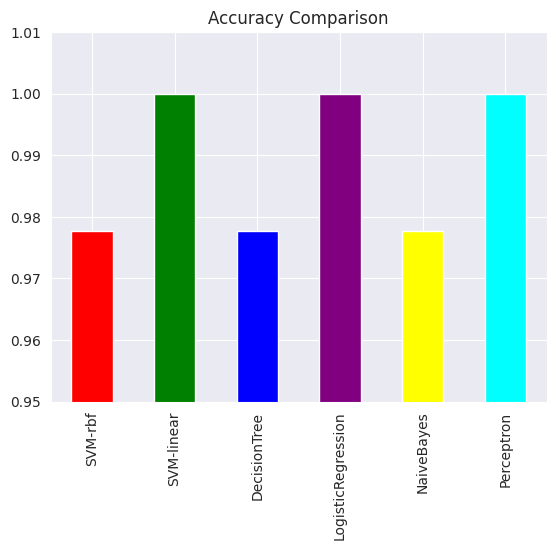

In [440]:
acc = pd.Series(acc)

plt.title("Accuracy Comparison")
ax.tick_params(axis='x', colors="aqua")
ax.tick_params(axis='y', colors='red')
colors = ['red', 'green', 'blue', 'purple','yellow','cyan']
plt.ylim(0.95,1.01)

acc.plot(kind ='bar', color = colors)

## Applying Models on entire Dataset

In [441]:
pred_full = [clf.predict(data.iloc[:,:4]) for clf in models]

In [442]:
full_pred = {}

for i in range(0,6):
        full_pred[acc.keys()[i]] = pred_full[i]

In [443]:
pred_data = pd.concat([data2d,pd.DataFrame(full_pred)], axis = 1)

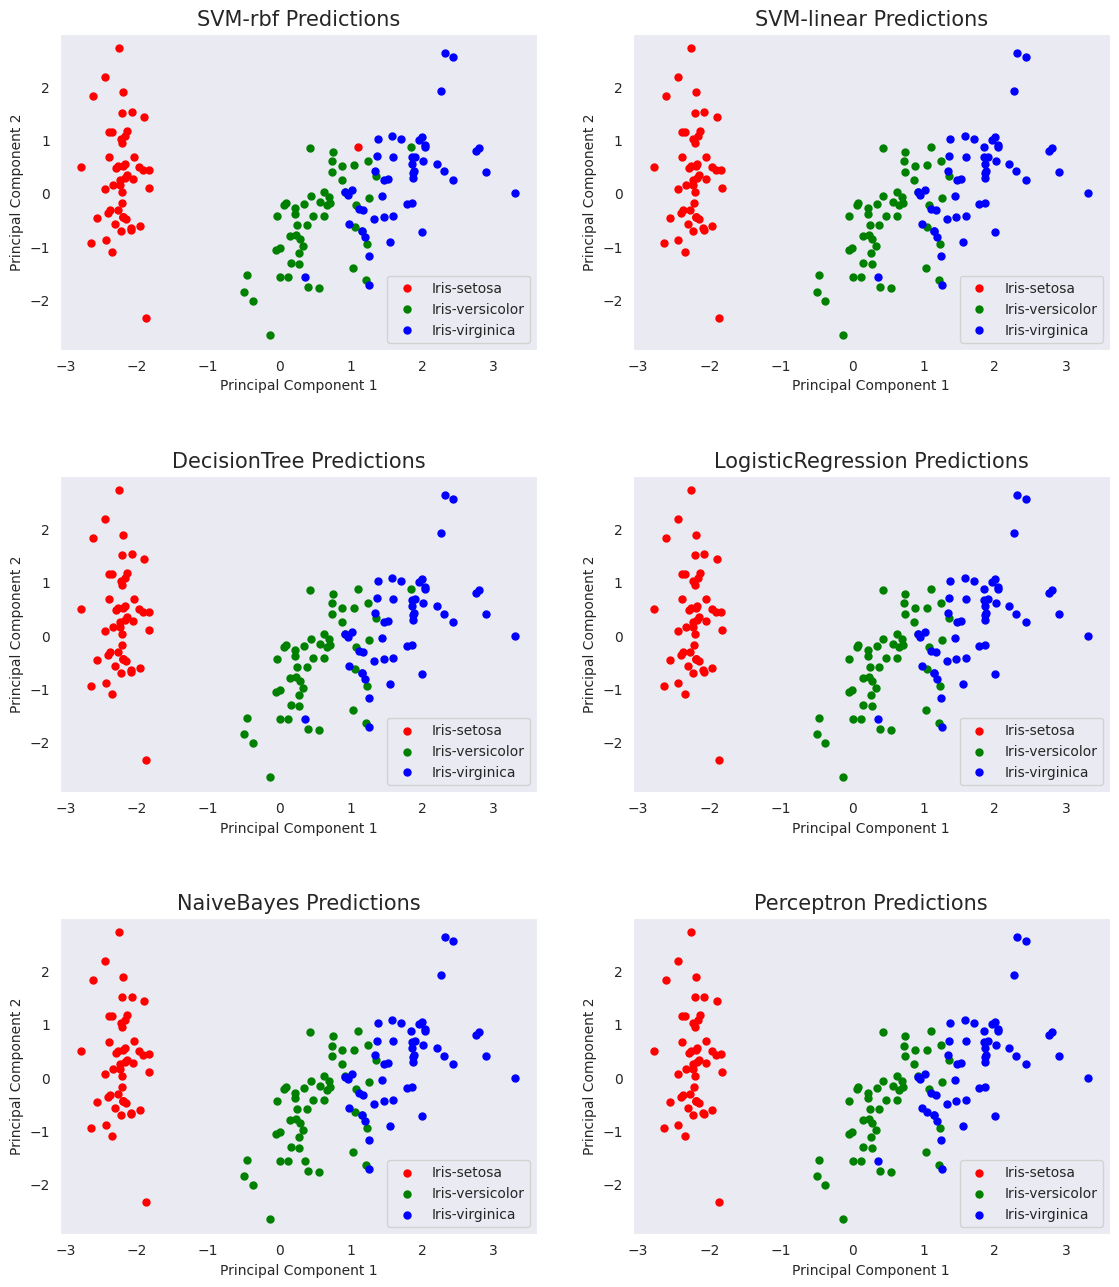

In [444]:
fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2

for i in range(1,7):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_xlabel('Principal Component 1', fontsize=10)
        ax.set_ylabel('Principal Component 2', fontsize=10)
        ax.set_title(modelnames[i-1]+" Predictions", fontsize=15)
        targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
        colors = ['r', 'g', 'b']

        for target, color in zip(targets, colors):
                indicesToKeep = pred_data[modelnames[i-1]] == target
                ax.scatter(pred_data.loc[indicesToKeep, 'pc1'],
                           pred_data.loc[indicesToKeep, 'pc2'],
                           c=color,
                           s=25)
        ax.legend(targets)
        ax.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)